## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

## Classification

In [2]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [5]:
# set up a machine learning model
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5,
)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

In [6]:
#  the transformer stores a dictionary of feature:metric pairs
# in this case is the roc_auc of each individual model

sel.feature_performance_

{'var_1': 0.48759020935700487,
 'var_2': 0.5058455632195464,
 'var_3': 0.4905893433970702,
 'var_4': 0.501280485601121,
 'var_5': 0.5015462290495752,
 'var_6': 0.5002462511182958,
 'var_7': 0.5053979068038364,
 'var_8': 0.5087211161246776,
 'var_9': 0.498649613285204,
 'var_10': 0.5039411880420529,
 'var_11': 0.5045142278123503,
 'var_12': 0.5033303972834808,
 'var_13': 0.5012505387983398,
 'var_14': 0.5095494165884838,
 'var_15': 0.5067021589484485,
 'var_16': 0.5770565890399896,
 'var_17': 0.49632958249153347,
 'var_18': 0.5023774207318409,
 'var_19': 0.5014536314756239,
 'var_20': 0.49519018640472234,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030907451620599,
 'var_23': 0.5031350199371307,
 'var_24': 0.4987182226292746,
 'var_25': 0.49718279702396107,
 'var_26': 0.49633350787741276,
 'var_27': 0.4977052030938432,
 'var_28': 0.5066250313010531,
 'var_29': 0.5033222413716505,
 'var_30': 0.5062984510734306,
 'var_31': 0.4980759342603509,
 'var_32': 0.49568215544717537,
 'var_33': 0.

Text(0, 0.5, 'roc-auc')

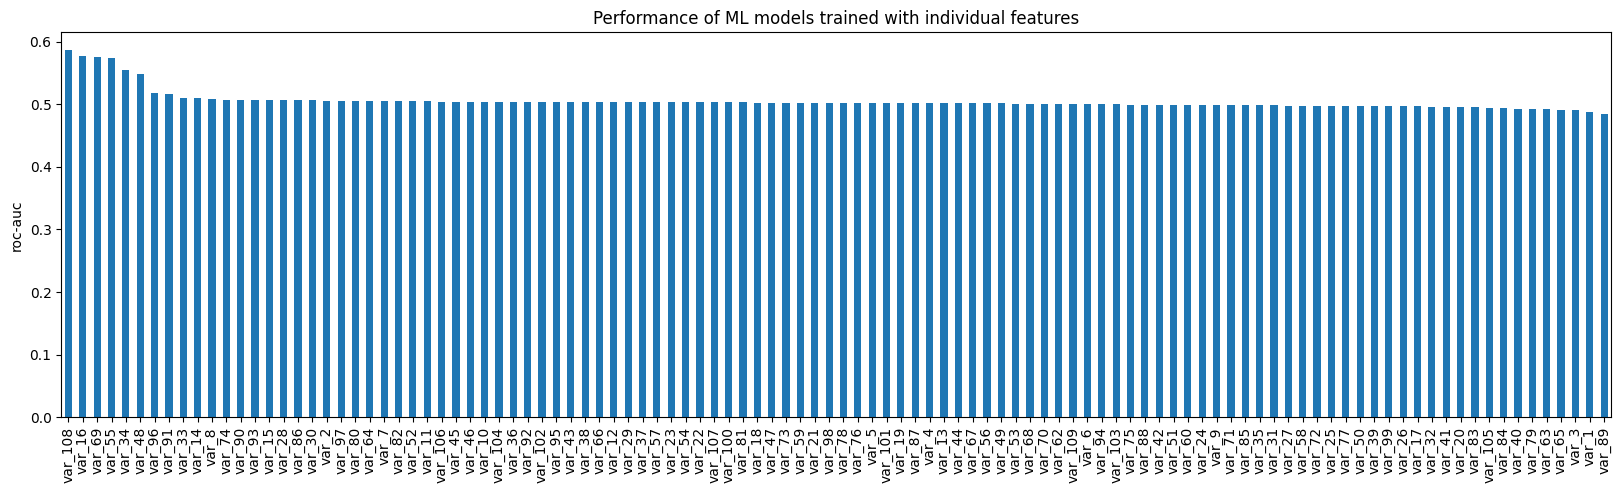

In [7]:
# we can plot feature importance sorted by importance

pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [8]:
# the features that will be removed

len(sel.features_to_drop_)

36

In [9]:
# remove non-prective features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

In [10]:
# load dataset

data = pd.read_csv('../houseprice.csv')

data.shape

(1460, 81)

In [11]:
# I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
# fill missing values
data.fillna(0, inplace=True)

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [15]:
# set up the machine learning model
rf = RandomForestRegressor(
    n_estimators=10, max_depth=2, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="r2",
    cv=3,
    threshold=0.5,
)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=2,
                                                                 n_estimators=10,
                                                                 n_jobs=4,
                                                                 random_state=1),
                                 scoring='r2', threshold=0.5)

In [16]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the r2 can be positive or negative.
# the selector selects based on the absolute value

sel.feature_performance_

{'MSSubClass': 0.18514034601982418,
 'LotFrontage': 0.1129543796082455,
 'LotArea': 0.18072827270865235,
 'OverallQual': 0.6390607189504983,
 'OverallCond': 0.10099732436450067,
 'YearBuilt': 0.34969187588528144,
 'YearRemodAdd': 0.26011141213081274,
 'MasVnrArea': 0.16739999652926915,
 'BsmtFinSF1': 0.1989808667134347,
 'BsmtFinSF2': -0.009703547431066162,
 'BsmtUnfSF': 0.05878832827833499,
 'TotalBsmtSF': 0.406720068174464,
 '1stFlrSF': 0.34510202976681503,
 '2ndFlrSF': 0.21988067672483705,
 'LowQualFinSF': -0.025701997588528352,
 'GrLivArea': 0.47416720514000604,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'FullBath': 0.33009421507209774,
 'HalfBath': 0.07062920270257249,
 'BedroomAbvGr': 0.04170276147375155,
 'KitchenAbvGr': 0.0013083175726592937,
 'TotRmsAbvGrd': 0.2638005756723682,
 'Fireplaces': 0.22352442100930417,
 'GarageYrBlt': 0.3244535905924391,
 'GarageCars': 0.47450883716087217,
 'GarageArea': 0.40288417091771045,
 'WoodDeckSF': 0.08310

Text(0, 0.5, 'r2')

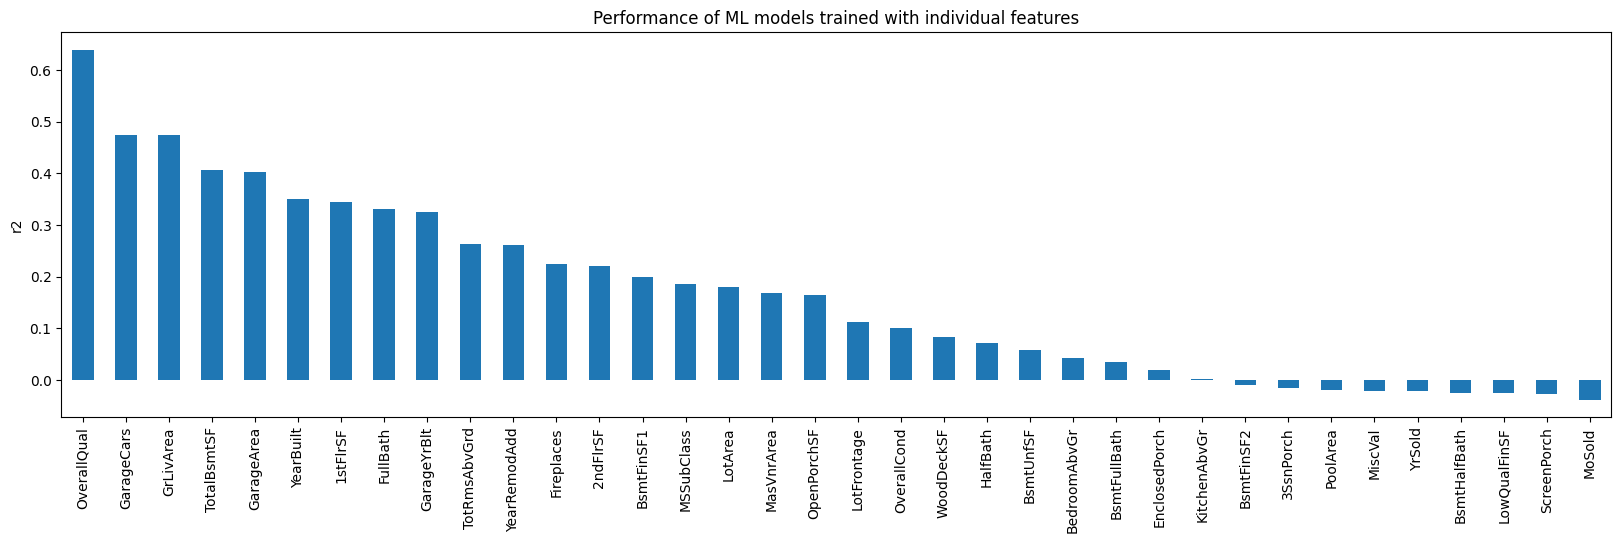

In [17]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

Text(0, 0.5, 'r2 - absolute value')

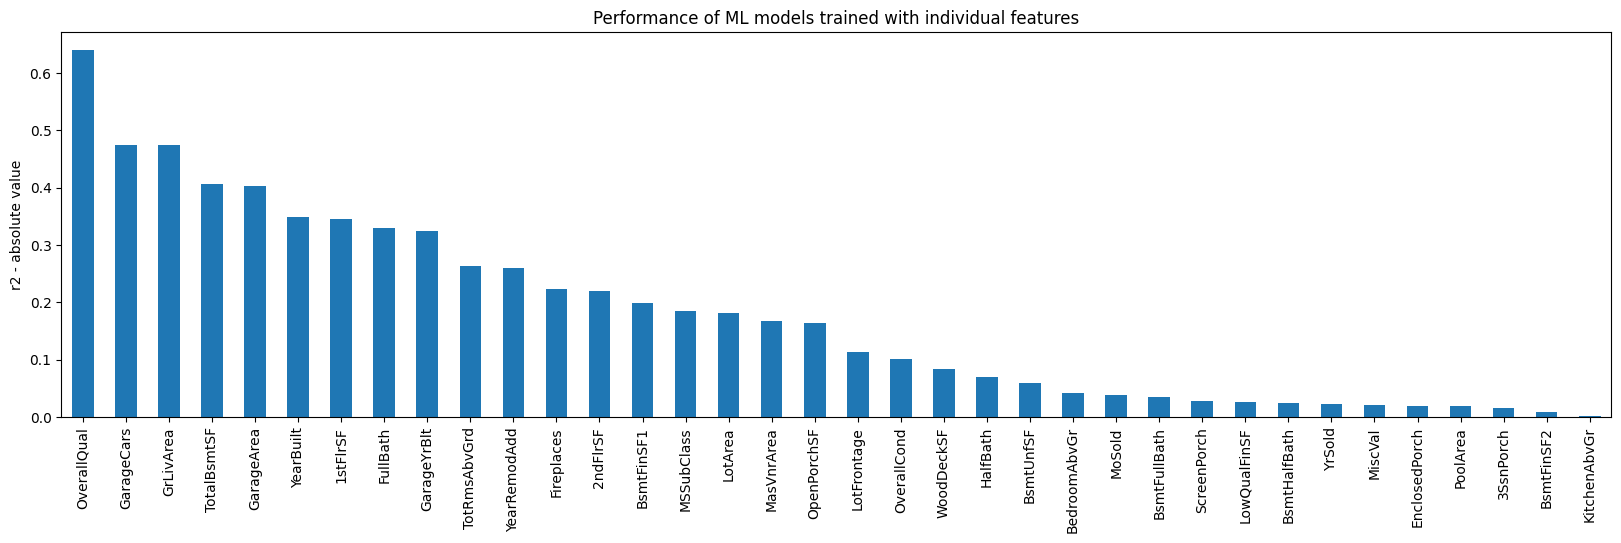

In [18]:
# same plot but taking the absolute value of the r2

np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2 - absolute value')

In [19]:
# the features that will be removed

len(sel.features_to_drop_)

35

In [20]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1022, 1), (438, 1))

**HOMEWORK**

Try selecting features using other metrics instead of the roc_auc and r2. Use for example the accuracy for classification and the neg_mean_squared_error, to become familiar with the use of this selector.